# Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Cargar los datos y analizar los datos

In [3]:
train = pd.read_csv('./data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test = pd.read_csv('./data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.shape

(418, 11)

# Visualización de edades usando Matplotlib

In [4]:
ages = train['Age'].dropna().tolist()

In [11]:
ages[:10]

[22.0, 38.0, 26.0, 35.0, 35.0, 54.0, 2.0, 27.0, 14.0, 4.0]

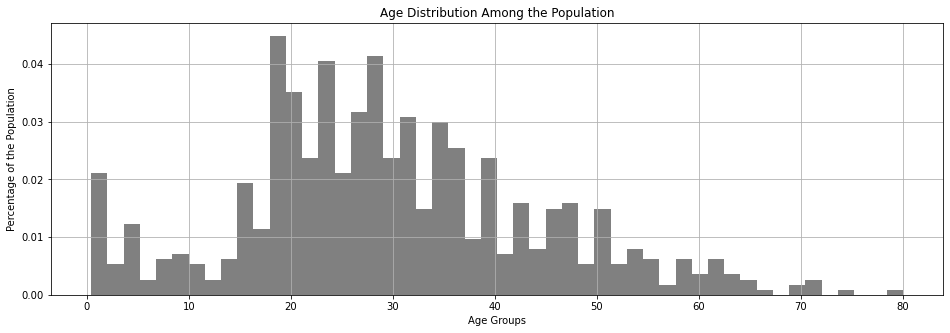

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(16,5))
plt.hist(ages, histtype = 'bar', color = 'gray', 
         bins=50, density=True)
plt.xlabel('Age Groups')
plt.ylabel('Percentage of the Population')
plt.title('Age Distribution Among the Population')
plt.grid(True)
plt.show()

# Usando Seaborn

/home/patricia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


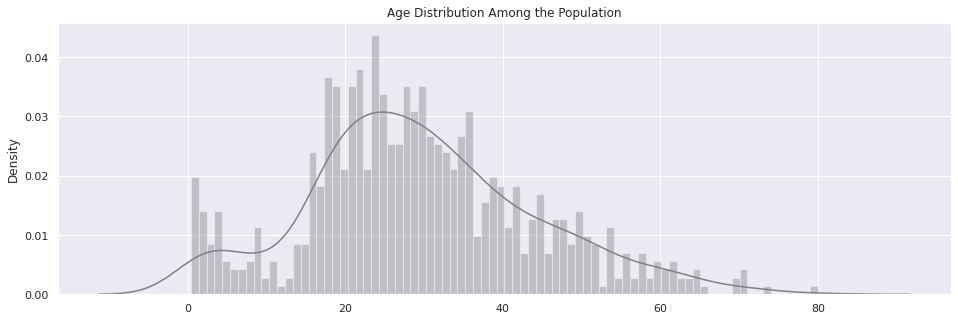

In [13]:

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,5)})


sns.distplot(a = ages, bins = 80, color = 'gray', vertical = False
            ).set_title('Age Distribution Among the Population')
plt.savefig("./images/distribution.png")

# Visualización del sexo con Matplotlib

In [14]:
sex = train['Sex'].dropna().tolist()

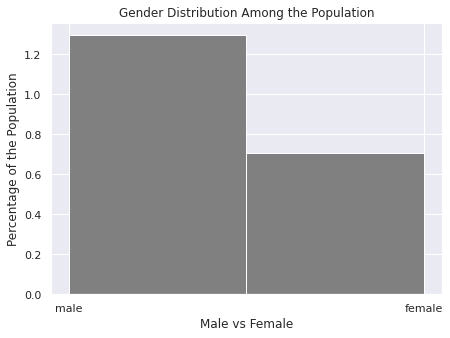

<Figure size 1152x360 with 0 Axes>

In [15]:
plt.figure(figsize=(7,5))
plt.hist(sex, histtype = 'bar', color = 'gray', bins=2, density=True)
plt.xlabel('Male vs Female')
plt.ylabel('Percentage of the Population')
plt.title('Gender Distribution Among the Population')
plt.grid(True)
plt.show()
plt.savefig("./images/sex.png")

# Usando Seaborn

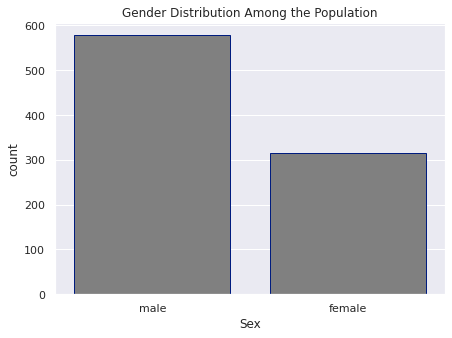

In [16]:
sns.set(rc={'figure.figsize':(7,5)})


sns.countplot(x="Sex", 
              data = train, 
              color = 'gray', 
              edgecolor=sns.color_palette("dark", 1)
             ).set_title('Gender Distribution Among the Population')
plt.savefig("./images/snssex.png")

# Distribución de género entre las tres clases

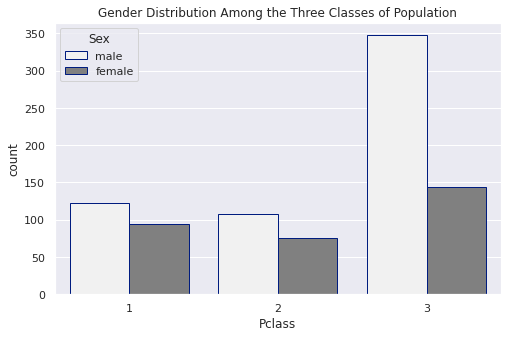

In [17]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(x="Pclass", hue="Sex", 
              data = train, color = 'gray', 
              edgecolor=sns.color_palette("dark", 1)
             ).set_title('Gender Distribution Among the Three Classes of Population')
plt.savefig("./images/sex_classes.png")

# Distribución de género entre sobrevivientes y fallecidos

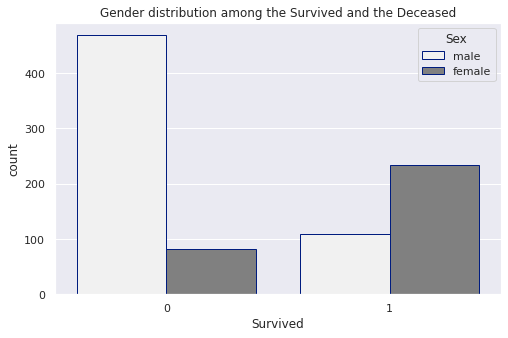

In [18]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(x="Survived", hue="Sex", 
              data = train, color = 'gray', 
              edgecolor=sns.color_palette("dark", 1)
             ).set_title('Gender distribution among the Survived and the Deceased')
plt.savefig("./images/sex_surivived.png")

# Distribución de supervivencia entre las tres clases 

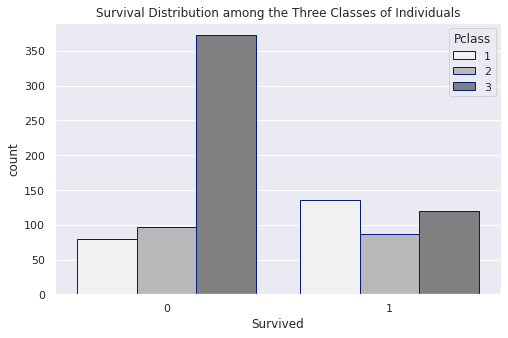

In [19]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(x="Survived", hue="Pclass", 
              data = train, color = 'gray', 
              edgecolor=sns.color_palette("dark", 1)
             ).set_title('Survival Distribution among the Three Classes of Individuals')
plt.savefig("./images/classes_surivived.png")

# Trazar la supervivencia de la población con respecto a su género y clase

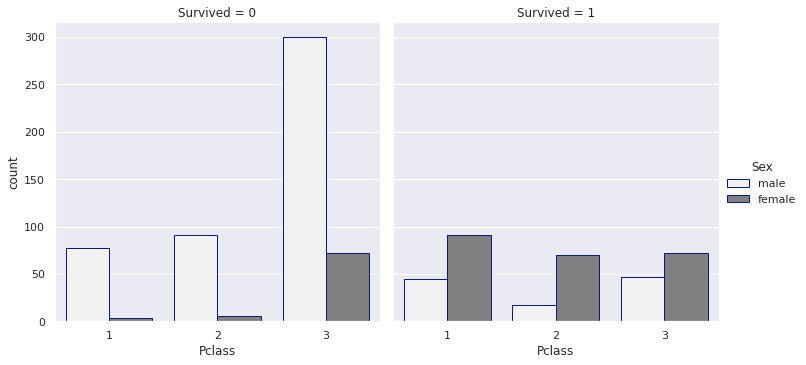

In [20]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

sns.catplot(x="Pclass", hue="Sex", col="Survived", 
            data=train, kind="count", color = 'gray', 
            edgecolor=sns.color_palette("dark", 1))
plt.savefig("./images/classes_sex_surivived.png")

In [21]:
SibSp = train['SibSp'].dropna().tolist()

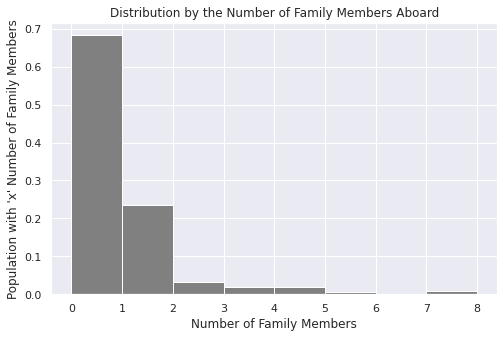

<Figure size 864x360 with 0 Axes>

In [22]:
plt.figure(figsize=(8,5))
plt.hist(SibSp, histtype = 'bar', color = 'gray', bins=8, density=True)
plt.xlabel('Number of Family Members')
plt.ylabel('Population with \'x\' Number of Family Members')
plt.title('Distribution by the Number of Family Members Aboard')
plt.grid(True)
plt.show()
plt.savefig("./images/sibsp.png")

# Distribución de la población con diferente número de miembros de la familia a bordo agrupados por género

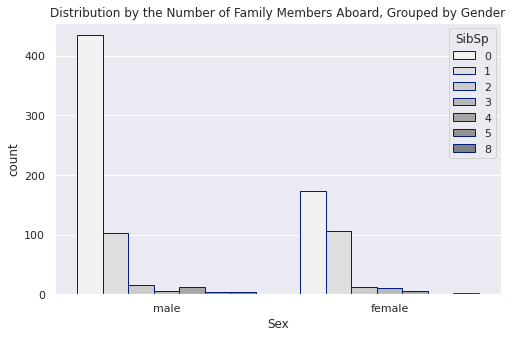

In [23]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(x="Sex", hue="SibSp", data = train, color = 'gray', 
              edgecolor=sns.color_palette("dark", 1)
             ).set_title('Distribution by the Number of Family Members Aboard, Grouped by Gender')
plt.savefig("./images/sibsp_gender.png")

# Visualización del puerto por el que subieron a bordo las tres clases de población

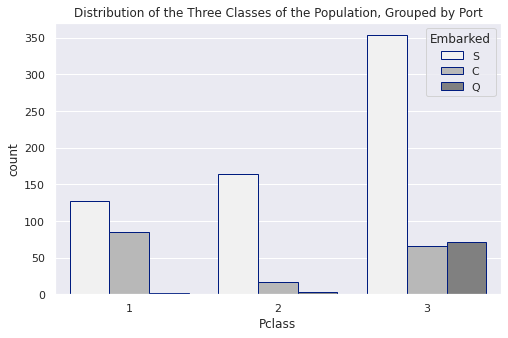

In [24]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(x="Pclass", hue="Embarked", data = train, color = 'gray', 
              edgecolor=sns.color_palette("dark", 1)
             ).set_title('Distribution of the Three Classes of the Population, Grouped by Port')
plt.savefig("./images/port_gender.png")

# Preprocesamiento

In [25]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##  Obtener el título

In [28]:
 #train['Name'].unique().tolist()

In [29]:
titles = ['Mrs', 'Mr', 'Don', 'Jonkheer', 'Master', 'Miss', 'Major', 
          'Rev', 'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess']

def get_title(name):
    for title in titles:
        if title in name:
            return title
    return 'None'
        
print(get_title('Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'))
print(get_title('Williams, Mr. Charles Eugene'))
print(get_title("Lobb, Mrs. William Arthur (Cordelia K Stanlick"))

Mrs
Mr
Mrs


In [30]:
train['Title'] = train['Name'].apply(lambda x: get_title(x))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Rellenar con la media de las edas las edades nulas

In [31]:
train['Age'].mean()

29.69911764705882

In [32]:
train['Age'].fillna(train['Age'].mean(), inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Eliminar las columnas `Cabin`

In [33]:
train.drop('Cabin', axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [34]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64

 ### Como hemos rellenado las edades con la media y elimando la columna  `Cabin` que no la íbamos a usar. Comprobamos los nulos y los eliminamos

In [35]:
train.dropna(inplace = True)


In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


# Separamos los valores train y test

In [67]:
x_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
y_train = train['Survived']

In [68]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [69]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Codificación One-Hot en datos categóricos.

In [70]:
x_train = pd.get_dummies(x_train)

In [71]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Jonkheer,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,3,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [72]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          889 non-null    int64  
 1   Age             889 non-null    float64
 2   SibSp           889 non-null    int64  
 3   Parch           889 non-null    int64  
 4   Fare            889 non-null    float64
 5   Sex_female      889 non-null    uint8  
 6   Sex_male        889 non-null    uint8  
 7   Embarked_C      889 non-null    uint8  
 8   Embarked_Q      889 non-null    uint8  
 9   Embarked_S      889 non-null    uint8  
 10  Title_Capt      889 non-null    uint8  
 11  Title_Col       889 non-null    uint8  
 12  Title_Countess  889 non-null    uint8  
 13  Title_Don       889 non-null    uint8  
 14  Title_Dr        889 non-null    uint8  
 15  Title_Jonkheer  889 non-null    uint8  
 16  Title_Major     889 non-null    uint8  
 17  Title_Master    889 non-null    uin

# Model Training

In [73]:
# Inicializamos el modelo
clf = RandomForestClassifier(max_depth=75, random_state=0)

In [74]:
# Entrenamos el modelo
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=75, random_state=0)

# Model Test

Aplicamos todos los cambio al dataset de test

In [75]:

test['Title'] = test['Name'].apply(lambda x: get_title(x))
test['Age'].fillna(test['Age'].mean(), inplace = True)
test.drop('Cabin', axis = 1, inplace = True)
test.head()

KeyError: "['Cabin'] not found in axis"

In [76]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [77]:
x_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


In [78]:
x_test = pd.get_dummies(x_test)

In [79]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Sex_female    418 non-null    uint8  
 6   Sex_male      418 non-null    uint8  
 7   Embarked_C    418 non-null    uint8  
 8   Embarked_Q    418 non-null    uint8  
 9   Embarked_S    418 non-null    uint8  
 10  Title_Col     418 non-null    uint8  
 11  Title_Don     418 non-null    uint8  
 12  Title_Dr      418 non-null    uint8  
 13  Title_Master  418 non-null    uint8  
 14  Title_Miss    418 non-null    uint8  
 15  Title_Mr      418 non-null    uint8  
 16  Title_Mrs     418 non-null    uint8  
 17  Title_Rev     418 non-null    uint8  
dtypes: float64(2), int64(3), uint8

In [80]:
total_titles = train['Title'].unique().tolist()
test_titles = test['Title'].unique().tolist()

for title in total_titles:
    if title not in test_titles:
        print('Title ' + str(title) + ' not in Test Set')
        x_test['Title_' + str(title)] = 0

Title Mme not in Test Set
Title Ms not in Test Set
Title Major not in Test Set
Title Mlle not in Test Set
Title Capt not in Test Set
Title Countess not in Test Set
Title Jonkheer not in Test Set


In [81]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Sex_female      418 non-null    uint8  
 6   Sex_male        418 non-null    uint8  
 7   Embarked_C      418 non-null    uint8  
 8   Embarked_Q      418 non-null    uint8  
 9   Embarked_S      418 non-null    uint8  
 10  Title_Col       418 non-null    uint8  
 11  Title_Don       418 non-null    uint8  
 12  Title_Dr        418 non-null    uint8  
 13  Title_Master    418 non-null    uint8  
 14  Title_Miss      418 non-null    uint8  
 15  Title_Mr        418 non-null    uint8  
 16  Title_Mrs       418 non-null    uint8  
 17  Title_Rev       418 non-null    uin

In [89]:
x_train.shape


(889, 25)

In [90]:
x_test.shape

(418, 25)

In [108]:
Survived = clf.predict(x_test)
Survived

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
gender_submission = pd.read_csv('./data/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [112]:
gender_submission['Survived'] = Survived
gender_submission.to_csv('./data/submission_titanic.csv', index=False)

In [104]:
X_tr, X_vid, y_tr, y_vid = train_test_split(x_train, y_train, test_size=0.3, random_state=2018)

In [105]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [106]:
prediction = model.predict(X_vid)

In [107]:
metrics.accuracy_score(prediction, y_vid)

0.8314606741573034

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]


random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

reg_rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_random.fit(X_tr, y_tr)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.5s finished


{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [122]:
prediction = rf_random.predict(X_vid)

In [123]:
metrics.accuracy_score(prediction, y_vid)

0.846441947565543

In [126]:
survived = rf_random.predict(x_test)

In [127]:
gender_submission2 = pd.read_csv('./data/gender_submission.csv')
gender_submission2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [128]:
gender_submission2['Survived'] = Survived
gender_submission2.to_csv('./data/submission_titanic2.csv', index=False)